### Importing Modules

In [1]:
import pandas as pd
import pickle
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import random
# Need to make a GCToo object to save it as a gct file
from cmapPy.pandasGEXpress.GCToo import GCToo
from cmapPy.pandasGEXpress.write_gct import write

#### Note :
For all the datasets the data had the gene symbols in the form of ensemble-ids, for that PAM50_mapping was created which maps the gene symbols of PAM50 gene set to its ensembl ids. Using the mapping, we have subsetted the data using the PAM50 ensembl ids and then changed it to gene symbols. The original dataframes are present in the src folder of the directory

In [2]:
PAM50_Mapping = pickle.load(open('./src/PAM50_Mapping.p', "rb"))
PAM50_ensembl_ids = list(PAM50_Mapping.values())
print (PAM50_ensembl_ids)

['ENSG00000104332', 'ENSG00000080986', 'ENSG00000101057', 'ENSG00000171428', 'ENSG00000148773', 'ENSG00000129514', 'ENSG00000174371', 'ENSG00000165304', 'ENSG00000141736', 'ENSG00000092621', 'ENSG00000134057', 'ENSG00000094804', 'ENSG00000146648', 'ENSG00000171791', 'ENSG00000117724', 'ENSG00000173890', 'ENSG00000160867', 'ENSG00000107262', 'ENSG00000143228', 'ENSG00000186081', 'ENSG00000133627', 'ENSG00000089685', 'ENSG00000062038', 'ENSG00000171604', 'ENSG00000091831', 'ENSG00000141738', 'ENSG00000135679', 'ENSG00000091651', 'ENSG00000186868', 'ENSG00000138180', 'ENSG00000175063', 'ENSG00000128422', 'ENSG00000176890', 'ENSG00000136997', 'ENSG00000261857', 'ENSG00000164611', 'ENSG00000141424', 'ENSG00000142945', 'ENSG00000171848', 'ENSG00000099953', 'ENSG00000115648', 'ENSG00000186847', 'ENSG00000054598', 'ENSG00000151715', 'ENSG00000106605', 'ENSG00000105173', 'ENSG00000082175', 'ENSG00000077152', 'ENSG00000011426', 'ENSG00000117399']


In [3]:
print ("Creating Subset for Ovarian Cancer Data")
OV = pd.read_csv('./src/Ovarian_mat.csv')
OV.loc[:, 'Gene']= OV.Gene.apply(lambda x: x.split('.')[0])
OV.set_index('Gene', inplace = True)
OV_data_modified = OV.loc[PAM50_ensembl_ids]
OV_data_modified.to_csv('./src/OV_data_modified.csv')

print ("Creating Subset for KICH Cancer Data")
KICH = pd.read_csv('./src/KICH_mat.csv')
KICH.loc[:, 'Gene']= KICH.Gene.apply(lambda x: x.split('.')[0])
KICH.set_index('Gene', inplace = True)
KICH_data_modified = KICH.loc[PAM50_ensembl_ids]
KICH_data_modified.to_csv('./src/KICH_data_modified.csv')

print ("Creating Subset for LIHC Cancer Data")
LIHC = pd.read_csv('./src/LIHC_mat.csv')
LIHC.loc[:, 'Gene']= LIHC.Gene.apply(lambda x: x.split('.')[0])
LIHC.set_index('Gene', inplace = True)
LIHC_data_modified = LIHC.loc[PAM50_ensembl_ids]
LIHC_data_modified.to_csv('./src/LIHC_data_modified.csv')

print ("Creating Subset for GBM Cancer Data")
GBM = pd.read_csv('./src/GBM_mat.csv')
GBM.loc[:, 'Gene']= GBM.Gene.apply(lambda x: x.split('.')[0])
GBM.set_index('Gene', inplace = True)
GBM_data_modified = GBM.loc[PAM50_ensembl_ids]
GBM_data_modified.to_csv('./src/GBM_data_modified.csv')

Creating Subset for Ovarian Cancer Data
Creating Subset for KICH Cancer Data
Creating Subset for LIHC Cancer Data
Creating Subset for GBM Cancer Data


In [4]:
def remove_outliers(features):
    z = np.abs(stats.zscore(features))
    return features[(z < 5 * np.std(stats.zscore(features))).all(axis=1)]

def plot_PCA(features, remove_outliers):
    if(remove_outliers == True):
        z = np.abs(stats.zscore(features))
        features = features[(z < 5 * np.std(stats.zscore(features))).all(axis=1)]
    
    # Apply PCA
    pca = PCA(n_components = 2)
    pca.fit(features)
    df_pca = pd.DataFrame(pca.transform(features), columns=['PC1', 'PC2'], index=features.index)
    plt.scatter(df_pca['PC1'], df_pca['PC2'])

    # Add the axis labels
    plt.xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
    plt.ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100)) 

    plt.show()

### Reading the files and Making Necessary Changes

#### Reading all the data and metadata files for the different type of Cancers
1. OV : Ovarian serous cystadenocarcinoma
2. KICH : Kidney Chromophobe
3. LIHC : Liver hepatocellular carcinoma
4. GBM : Glioblastoma multiforme

### OV Cancer Data

In [5]:
OV_data = pd.read_csv('./src/OV_data_modified.csv')
OV_meta = pd.read_csv('./src/OVCA_metadata.csv')

#### Shape of Ovarian Cancer Dataset from TCGA

In [6]:
print (OV_data.shape)
print (OV_meta.shape)

(50, 508)
(515, 8)


<B>Note :</B><BR>
Therefore the expression of 50 genes over 508 samples

#### PCA Analysis on OV data

#### Plot PCA :

PCA Plot with outliers


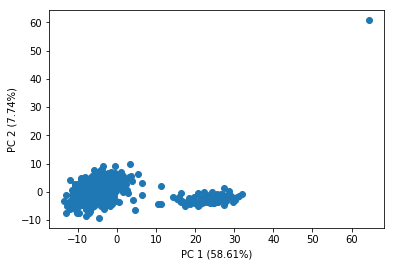

PCA Plot without outliers


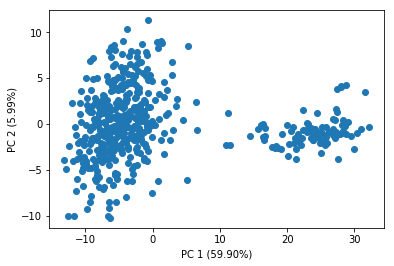

In [7]:
print ("PCA Plot with outliers")
plot_PCA(OV_data.set_index('Gene').T, False)
print ("PCA Plot without outliers")
plot_PCA(OV_data.set_index('Gene').T, True)

In [8]:
gct_Too_obj = GCToo(remove_outliers(OV_data.set_index('Gene').T).T)
write(gct_Too_obj, './src/OV_data.gct')

#### Inference : 
We can see that there are two clusters being formed in the case of Ovarian Cancer

#### Plot PCA Plots for the 1 random set of 50 features(genes)

#### Remove Outliers and plot PCA

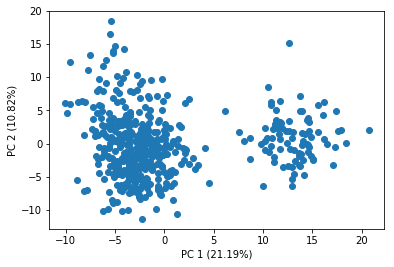

In [9]:
plot_PCA(OV.loc[random.sample(OV.index.tolist(), k = 50)].T, True)

### KICH Cancer data

In [10]:
meta_data = pd.read_csv('./src/meta.csv')

In [11]:
KICH_data = pd.read_csv('./src/KICH_data_modified.csv')
KICH_meta = meta_data[meta_data['matched_TCGACodes'] == 'KICH']

#### Shape of KICH Dataset from TCGA

In [12]:
print (KICH_data.shape)
print (KICH_meta.shape)

(50, 120)
(91, 8)


Therefore the expression of 50 genes over 120 samples

#### PCA Analysis on KICH data

#### Remove the outliers and plot PCA

PCA plot using PAM50 genes


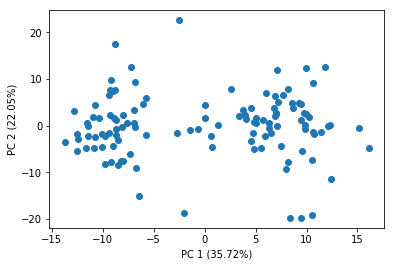

PCA plot using random 50 genes


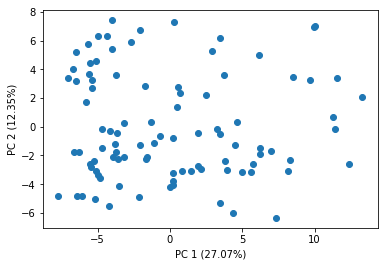

In [13]:
print ("PCA plot using PAM50 genes")
plot_PCA(KICH_data.set_index('Gene').T, True)

print ("PCA plot using random 50 genes")
KICH = pd.read_csv('./src/KICH_mat.csv', index_col = -1)
plot_PCA(KICH.loc[random.sample(KICH.index.tolist(), k = 50)].T, True)

#### Create GCT Object

In [14]:
gct_Too_obj = GCToo(remove_outliers(KICH_data.set_index('Gene')).T)
write(gct_Too_obj, './src/KICH_data.gct')

### LIHC Cancer data

In [15]:
LIHC_data = pd.read_csv('./src/LIHC_data_modified.csv')
LIHC_meta = meta_data[meta_data['matched_TCGACodes'] == 'LIHC']

#### Shape of LIHC Dataset from TCGA

In [16]:
print (LIHC_data.shape)
print (LIHC_meta.shape)

(50, 532)
(421, 8)


#### PCA Analysis on LIHC data

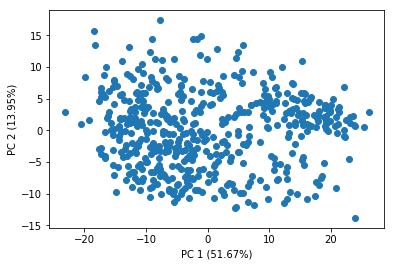

In [17]:
# Get Features by taking transpose
plot_PCA(LIHC_data.set_index('Gene').T, True)

#### Inference :
There is no type of clustering happening when using PAM50 features as classifiers

### GBM Cancer Data

In [18]:
GBM_data = pd.read_csv('./src/GBM_data_modified.csv')
GBM_meta = meta_data[meta_data['matched_TCGACodes'] == 'GBM']

#### Shape of GBM Cancer Data

In [19]:
print (GBM_data.shape)
print (GBM_meta.shape)

(50, 379)
(171, 8)


Therefore the expression of 50 genes over 392 samples

#### PCA Analysis on GBM data using PAM50 genes

In [20]:
GBM = pd.read_csv('./src/GBM_mat.csv', index_col = -1)

PCA plot using PAM50 genes


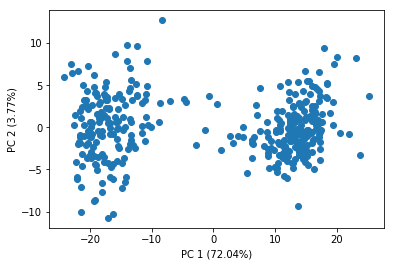

PCA plot using random 50 genes


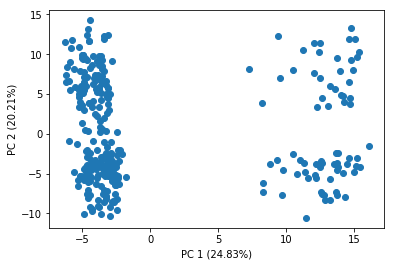

In [21]:
print ("PCA plot using PAM50 genes")
plot_PCA(GBM_data.set_index('Gene').T, True)

print ("PCA plot using random 50 genes")
plot_PCA(GBM.loc[random.sample(GBM.index.tolist(), k = 50)].T, True)

In [22]:
gct_Too_obj = GCToo(remove_outliers(GBM_data.set_index('Gene')))
write(gct_Too_obj, './src/GBM_data.gct')